# Rules for Derivatives - Lab

## Introduction

In this lab, we will practice implementing the rules for derivatives with code.  This lab will review your understanding of the following rules:

1. The power rule
2. The constant factor rule
3. The addition rule

## Objectives

You will be able to:

- Understand the rules for taking the derivative of each term
- Understand how to take the derivative of a function

## Let's get started!

As you know we can represent polynomial functions as a numpy array in Python: 

* Each term is represented as a row, for example, $2x^3$ is expressed as `(2, 3)`.
* And an entire function is expressed as 2D numpy array, like $f(x)=2x^3+7x$ is expressed as `np.array([[2, 3], [7, 1]])`.
* Between columns in our array, we imagine there is a plus sign. To subtract elements we simply place a negative sign before the first element in the row. For example, $f(x)= x^2 - 4x$ is represented as `np.array([[1, 2], [-4, 1]])`. 

### Writing our derivative functions

Let's start by writing a function called `find_term_derivative` that returns the derivative of a single term.  The function takes the derivative of one term represented as an array, say $(1, 3)$, and returns its derivative, also represented as an array.  For example, if the function is $f(x) = 2x^4$ so its derivative is $f'(x) = 8x^3$, then our function `find_term_derivative` should take an input of `(2, 4)` and return `(8, 3)`.

In writing `find_term_derivative`, let's first consider the function $f(x) = x^3$, and write the function so that it takes the derivative of the term.

In [1]:
import numpy as np
array_cubed_1 = np.array([1, 3])
array_cubed_1

array([1, 3])

In [18]:
def find_term_derivative(term):
    const = term[0]*term[1]
    power = term[1]-1
    return np.array([const, power])
# return something which looks like: np.array([constant, exponent])

In [19]:
# use find_term_derivative on array_cubed_1
find_term_derivative(array_cubed_1)
# array([3, 2])

array([3, 2])

Let's try the function with $f(x) = 2x^2$.

In [20]:
array_squared = np.array([2, 2])
# use find_term_derivative on array_squared
find_term_derivative(array_squared)
# array([4, 1])

array([4, 1])

Ok, now that we have a Python function called `find_derivative` that can take a derivative of a term, write a function that take as an argument our multi-termed function, and return the derivative of the multi-term function represented as a 2D array. 

For example, if the derivative of a function $f(x)$ is $f'(x) = 2x^3 + 4x^2$, then the function `find_derivative` should return `[(2, 3), (4, 2)]`.

> Imagine that a plus sign separates each of our terms.  Again, if we need a negative term, then we add a minus sign to the first element of the row.

In [22]:
def find_derivative(function_terms):
    derivative = np.zeros(np.shape(function_terms))
    for i in range(int(np.shape(function_terms)[0])):
        derivative[i] = find_term_derivative(function_terms[i])
    return derivative

Let's apply this function to $f(x) = 4x^3 - 3x$.

In [23]:
array_cubed_2 = np.array([(4, 3), (-3, 1)])
find_derivative(array_cubed_2)
# [(12, 2), (-3, 0)]

array([[12.,  2.],
       [-3.,  0.]])

One gotcha to note is when one of our terms is a constant, when taking the derivative, the constant will be equal to 0, while the exponent technically becomes negative (-1).  For example, when $f(x) = 3x^2 - 11$, the derivative $f'(x) = 6x$.  The reason why is because 11 is the same as $11*x^0$ which is also $11*1$, as anything raised to the zero power equals 1. And so the derivative of the term $11x^0$ equals $0*11*x^{-1} = 0$.  Our `find_derivative` function should return a zero for the constant and -1 for the exponent.  Let's store $f(x) = 3x^2 - 11$ in `array_squared_1` and apply `find_derivative` to it.

In [28]:
array_squared_1 = np.array([[3, 2], [-11, 0]])
find_derivative(array_squared_1)
# use find_derivative on array_squared_1
# array([[6., 1.],
#       [0., -1.]])

array([[ 6.,  1.],
       [ 0., -1.]])

Our next function is called, `derivative_at` which, when provided a list of terms and a value $x$ at which to evaluate the derivative, returns the value of derivative at that point.

In [35]:
def derivative_at(terms, x):
    terms =  find_derivative(terms)
    total = 0
    for term in terms:
        total += term[0] * (x**term[1])
    return total

In [36]:
# apply find_derivative to array_squared_1
find_derivative(array_squared_1)
# array([[6., 1.],
#       [0., -1.]])

array([[ 6.,  1.],
       [ 0., -1.]])

In [37]:
# apply derivative_at to array_squared_1, looking to get the derivative at x=2
derivative_at(array_squared_1, 2)
# 12

12.0

### Creating visualizations with our functions

Now that we have done the work of calculating the derivatives, we can begin to show the derivatives of functions with matplotlib. We have plotted derivatives previously, but we had to consider $\Delta x$ to do so.  Notice that with our rules, we no longer need to include $\Delta x$ as a parameter for our derivative calculating functions.  Similarly, we will not need to include $\Delta x$ as a parameter for our line tracing functions below.

#### Plotting the tangent line

First, let's take our `derivative_at` function, and use that in the `tangent_line` function below to display this calculation. The `derivative_at` a point on our function equals the slope of the tangent line, so we use the function to generate a `tangent_line` trace with the function below. You can use the `output_at` which we created in a previous lab in your `tangent_line` function.

In [38]:
def term_output(term, input_value):
    return term[0]*input_value**term[1]

def output_at(array_of_terms, x_value):
    outputs = []
    for i in range(int(np.shape(array_of_terms)[0])):
        outputs.append(array_of_terms[i][0]*x_value**array_of_terms[i][1])
    return sum(outputs)

In [39]:
import numpy as np

def tangent_line(list_of_terms, x_value, line_length = 4):
    y = output_at(list_of_terms, x_value)
    deriv = derivative_at(list_of_terms, x_value)
    
    x_dev = np.linspace(x_value - line_length/2, x_value + line_length/2, 50)
    tan = y + deriv *(x_dev - x_value)
    return {'x_dev':x_dev, 'tan':tan, 'lab': " f' (x) = " + str(deriv)}

Now, let's apply our function `tangent_line` to `array_squared_1`. Let's assume we want a tangent line for $x=5$ and a line length of 6.

In [40]:
tan_line = tangent_line(array_squared_1, 5, 6)
tan_line

{'x_dev': array([2.        , 2.12244898, 2.24489796, 2.36734694, 2.48979592,
        2.6122449 , 2.73469388, 2.85714286, 2.97959184, 3.10204082,
        3.2244898 , 3.34693878, 3.46938776, 3.59183673, 3.71428571,
        3.83673469, 3.95918367, 4.08163265, 4.20408163, 4.32653061,
        4.44897959, 4.57142857, 4.69387755, 4.81632653, 4.93877551,
        5.06122449, 5.18367347, 5.30612245, 5.42857143, 5.55102041,
        5.67346939, 5.79591837, 5.91836735, 6.04081633, 6.16326531,
        6.28571429, 6.40816327, 6.53061224, 6.65306122, 6.7755102 ,
        6.89795918, 7.02040816, 7.14285714, 7.26530612, 7.3877551 ,
        7.51020408, 7.63265306, 7.75510204, 7.87755102, 8.        ]),
 'tan': array([-26.        , -22.32653061, -18.65306122, -14.97959184,
        -11.30612245,  -7.63265306,  -3.95918367,  -0.28571429,
          3.3877551 ,   7.06122449,  10.73469388,  14.40816327,
         18.08163265,  21.75510204,  25.42857143,  29.10204082,
         32.7755102 ,  36.44897959,  40.122448

Now, let's plot our function $f(x) = 3x^2 + 11$ along with the tangent line for $x=5$

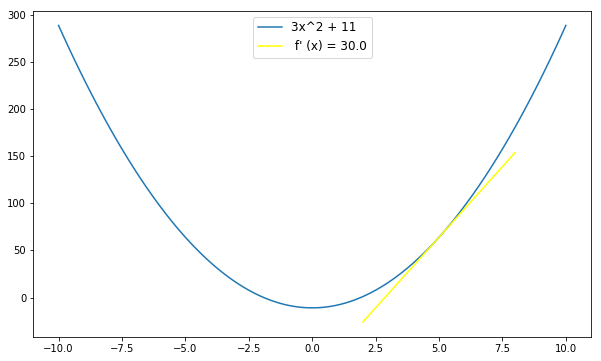

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

fig, ax = plt.subplots(figsize=(10,6))

x_values = np.linspace(-10, 10, 100)
y_values = list(map(lambda x: output_at(array_squared_1, x), x_values))

plt.plot(x_values, y_values, label = "3x^2 + 11")
plt.plot(tan_line['x_dev'], tan_line['tan'], color = "yellow", label = tan_line['lab'])

ax.legend(loc='upper center', fontsize='large');

#### Graphing the derivative across a range of values

We can also write a function that given a list of terms can plot the derivative across multiple values. After all, the derivative is just a function. For example, when $f(x) = 3x^2 - 11$, the derivative is $f'(x) = 6x$. Recall that we have our function $f(x) = 3x^2 - 11$ saved in `array_squared_1`.

In [42]:
array_squared_1 = np.array([[3, 20], [-11, 0]])

Now, you can use `np.linspace` to generate $x$-values between -10 and 10. Next you can use the `output_at` function and the `derivative_at` function along with lambda functions to generate $f(x)$ and $f'(x)$ respectively.

In [43]:
x_values = np.linspace(-10, 10, 100)
function_values = list(map(lambda x: output_at(array_squared_1, x), x_values))
derivative_values = list(map(lambda x: derivative_at(array_squared_1, x),x_values))

Now, let's plot $f(x)$ and $f'(x)$ side by side.

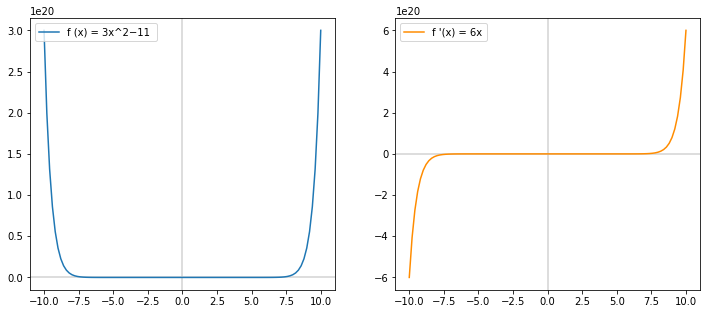

In [44]:
fig, ax = plt.subplots(figsize=(12,5))

# plot 1
plt.subplot(121)
plt.axhline(y=0, color='lightgrey', )
plt.axvline(x=0, color='lightgrey')
plt.plot(x_values, function_values, label = "f (x) = 3x^2−11 ")

plt.legend(loc="upper left", bbox_to_anchor=[0, 1], ncol=2, fancybox=True)

# plot 2
plt.subplot(122)
plt.axhline(y=0, color='lightgrey')
plt.axvline(x=0, color='lightgrey')
plt.plot(x_values, derivative_values,color="darkorange", label = "f '(x) = 6x")

ax.grid(True, which='both')

plt.legend(loc="upper left");

Note that when the $x$ values of $f(x)$ are positive, the $f(x)$ begins increasing, therefore $f'(x)$ is greater than zero, which the graph on the right displays.  And the more positive the values $x$ for $f(x)$, the faster the rate of increase.  When our function $f(x)$ is negative, the function is decreasing, that is for every change in $x$, the change in $f(x)$ is negative, and therefore $f'(x)$ is negative.

## Summary

In this lab, you practiced implementing the rules for derivatives with Python code using NumPy. This lab will review your understanding of the following rules:

1. The power rule
2. The constant factor rule
3. The addition rule